# Libraries

In [86]:
from tensorflow.keras.layers import Input , Lambda , Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import  preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow as tf

# Loading data

In [87]:
IMAGE_SIZE=[224,224]
train_path='data/cotton leaf/train'
test_path='data/cotton leaf/test'

In [90]:
folders=glob(f'{train_path}/*')

In [91]:
folders

['/content/drive/MyDrive/data/cotton leaf/train/fresh cotton leaf',
 '/content/drive/MyDrive/data/cotton leaf/train/fresh cotton plant',
 '/content/drive/MyDrive/data/cotton leaf/train/diseased cotton plant',
 '/content/drive/MyDrive/data/cotton leaf/train/diseased cotton leaf']

In [100]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [101]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [102]:
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [103]:
test_set=test_datagen.flow_from_directory(test_path,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 18 images belonging to 4 classes.


In [105]:
# !nvidia-smi

In [107]:
import matplotlib.pyplot as plt

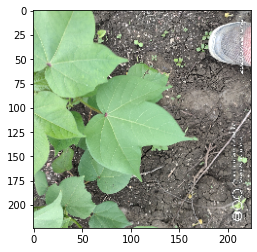

In [108]:
plt.imshow(test_set[0][0][0])

In [109]:
# test_set[0][1]

# Building model

In [110]:
cnn = tf.keras.models.Sequential()
# Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [111]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Model Training

In [112]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
61/61 [==============================] - 38s 613ms/step - loss: 1.1790 - accuracy: 0.5038 - val_loss: 1.0533 - val_accuracy: 0.5556
Epoch 2/30
61/61 [==============================] - 35s 565ms/step - loss: 0.9532 - accuracy: 0.6038 - val_loss: 0.8469 - val_accuracy: 0.6667
Epoch 3/30
61/61 [==============================] - 34s 562ms/step - loss: 0.8235 - accuracy: 0.6914 - val_loss: 0.5212 - val_accuracy: 0.8889
Epoch 4/30
61/61 [==============================] - 35s 567ms/step - loss: 0.6569 - accuracy: 0.7412 - val_loss: 0.5374 - val_accuracy: 0.8333
Epoch 5/30
61/61 [==============================] - 34s 562ms/step - loss: 0.5786 - accuracy: 0.7719 - val_loss: 0.3715 - val_accuracy: 0.8889
Epoch 6/30
61/61 [==============================] - 34s 563ms/step - loss: 0.4998 - accuracy: 0.8052 - val_loss: 0.2426 - val_accuracy: 1.0000
Epoch 7/30
61/61 [==============================] - 34s 561ms/step - loss: 0.4494 - accuracy: 0.8145 - val_loss: 0.0976 - val_accuracy: 1.0000

# Testing

In [113]:
def predict_it(image_location):
  test_image=image.load_img(image_location, target_size = IMAGE_SIZE)
  plt.imshow(test_image)
  test_image=image.img_to_array(test_image)
  test_image=test_image/255
  test_image = np.expand_dims(test_image, axis = 0)
  preds=np.argmax(cnn.predict(test_image))
  if preds==0:
    print("The leaf is diseased cotton leaf")
  elif preds==1:
    print("The leaf is diseased cotton plant")
  elif preds==2:
    print("The leaf is fresh cotton leaf")
  else:
    print("The leaf is fresh cotton plant")

The leaf is diseased cotton plant


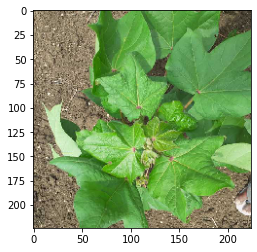

In [114]:
predict_it('data/cotton leaf/val/diseased cotton plant/dd (10)_iaip.jpg')

The leaf is fresh cotton leaf


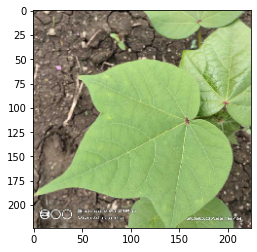

In [115]:
predict_it('data/cotton leaf/val/fresh cotton leaf/d (11)_iaip.jpg')

In [116]:
validation_set=test_datagen.flow_from_directory('data/cotton leaf/val',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 324 images belonging to 4 classes.


In [117]:
predicted=cnn.predict(validation_set[0][0])

In [118]:
actual=[]
for i in validation_set[0][1]:
  actual.append(np.argmax(i))
predict=[]
for i in predicted:
  predict.append(np.argmax(i))

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(actual,predict)

0.90625

[]

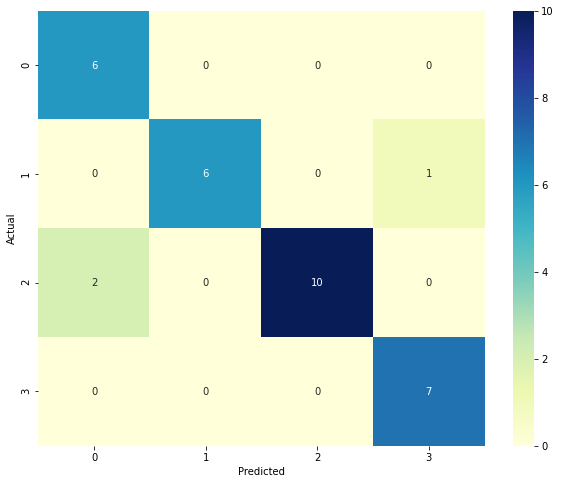

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_mtx = confusion_matrix(actual,predict) 
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,annot=True,annot_kws={"size": 10} , cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.plot()